In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#Data cleaning
raw = pd.read_excel('raw data for Andres - Morona BMAP.xlsx', sheet_name = 'Composition')
raw['Date'] = pd.to_datetime(raw['Date'], errors='coerce')
raw = raw.sort_values(['Phase #','Date']) #Sort by Phase and Date
raw["SVL (mm)"] = raw["SVL (mm)"].replace(['na'],[0])
#raw.dtypes
raw = raw.drop(['Zona','Cola (mm)', 'Codigo foto','Codigo hisopo','Codigo voucher','Obs adicionales'], axis=1)
#raw

In [3]:
#Choose representative species for visualization
##Find the frequency of animals in each phase
groups = raw.groupby(['Phase #','Especie']).size().reset_index(name='count') 
groups = groups.sort_values(by = ['Phase #','count'], ascending = [True,False])
#groups

#Choose 5 most popular animals in each phase
groups_selected = pd.DataFrame()
for i in range(1,6):
    groups_selected = groups_selected.append(groups[groups['Phase #']== i][0:5])
#groups_selected
    
print('Representative animals are:', groups_selected.Especie.unique())
groups_selected

Representative animals are: ['tacana' 'danae' 'aff pharangobates' 'gagliardi' 'sp' 'ockendeni'
 'andreae' 'sp nov']


,Phase #,Especie,count
14,1,tacana,41
6,1,danae,40
2,1,aff pharangobates,28
7,1,gagliardi,22
11,1,sp,20
32,2,tacana,32
21,2,danae,22
29,2,sp,17
25,2,ockendeni,16
18,2,andreae,10


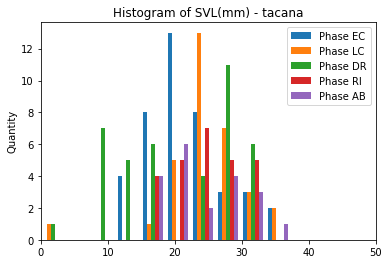

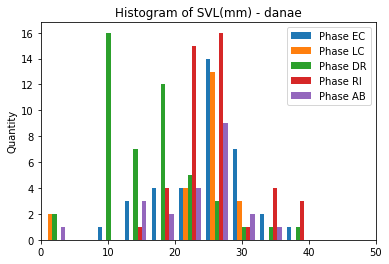

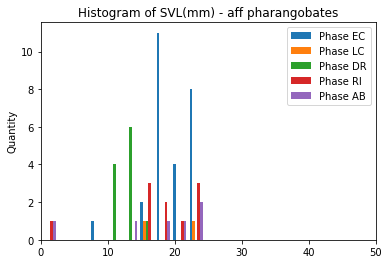

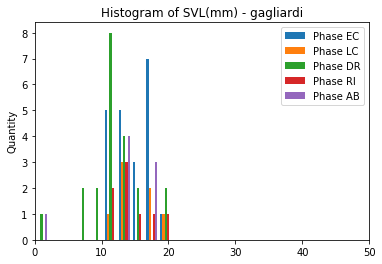

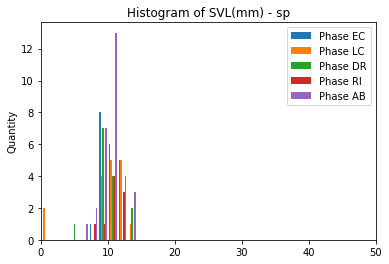

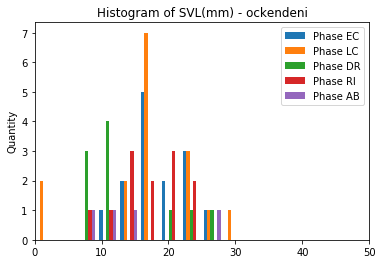

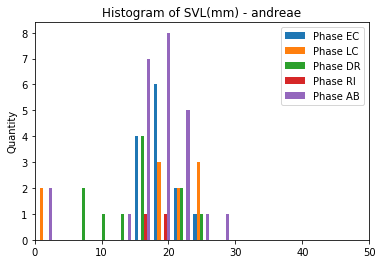

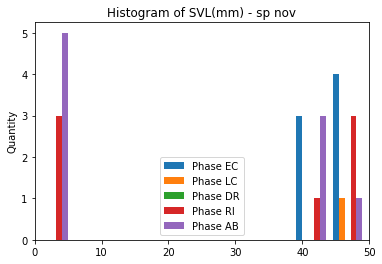

In [15]:
#Visualization by species
canvas = dict(alpha=1)
labels = ['Phase EC', 'Phase LC', 'Phase DR', 'Phase RI', 'Phase AB']

for n in groups_selected.Especie.unique():
    animal = raw[raw["Especie"] == n]
    plt.figure()
    data0 = pd.DataFrame()
    for i in range(1,6):
        data0 = data0.append(animal[animal['Phase #']==i]["SVL (mm)"])
    plt.hist(data0, **canvas,  label= labels)
    plt.gca().set(title='Histogram of SVL(mm) - '+n, ylabel='Quantity')
    plt.xlim(0,50)
    plt.legend()

In [6]:
noObser = pd.read_csv('noObser.csv', index_col = 0)
#noObser
haveObser = pd.read_csv('haveObser.csv', index_col = 0)
haveObser_clean = haveObser.groupby('Phase-1').agg('mean')[['OPE','Rain','S_fuel','flights']] 
noObser_clean = noObser.groupby('Phase-1').agg('mean')[['OPE','Rain','S_fuel','flights']]
haveObser_clean
# Aggregate mean value in each phase
# Example: 7.09 means in haveObesr dataset, the average # of OPE is 7.09 each day in Phase DR.

,OPE,Rain,S_fuel,flights
Phase-1,,,,
DR,7.090909,1.627273,175.636364,14.454545
EC,4.166667,2.458333,0.000000,5.333333
LC,14.833333,1.833333,469.250000,11.166667
RI,6.000000,0.000000,360.600000,3.600000


In [7]:
noObser_clean

,OPE,Rain,S_fuel,flights
Phase-1,,,,
DR,8.315789,1.789474,218.842105,14.052632
EC,1.611111,1.555556,35.555556,3.333333
LC,14.375000,2.312500,471.437500,8.375000
RI,5.578947,0.000000,373.736842,9.263158


In [12]:
join_clean =pd.concat([noObser_clean,haveObser_clean],axis =1)
join_clean.columns = ['OPE-0', 'Rain-0', 'S_fuel-0', 'flights-0', 'OPE-1', 'Rain-1', 'S_fuel-1', 'flights-1'] 
join_clean

,OPE-0,Rain-0,S_fuel-0,flights-0,OPE-1,Rain-1,S_fuel-1,flights-1
Phase-1,,,,,,,,
DR,8.315789,1.789474,218.842105,14.052632,7.090909,1.627273,175.636364,14.454545
EC,1.611111,1.555556,35.555556,3.333333,4.166667,2.458333,0.000000,5.333333
LC,14.375000,2.312500,471.437500,8.375000,14.833333,1.833333,469.250000,11.166667
RI,5.578947,0.000000,373.736842,9.263158,6.000000,0.000000,360.600000,3.600000


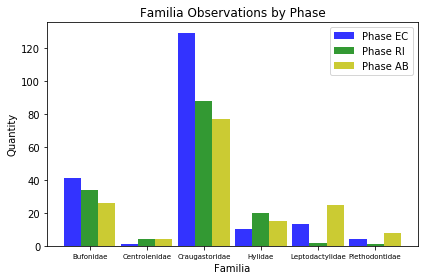

In [13]:
group_EC = raw.loc[raw["Phase"] == "EC"]
group_RI = raw.loc[raw["Phase"] == "RI"]
group_AB = raw.loc[raw["Phase"] == "AB"]

summary_EC = group_EC.groupby(['Familia']).size().reset_index(name = 'count')
summary_RI = group_RI.groupby(['Familia']).size().reset_index(name = 'count')
summary_AB = group_AB.groupby(['Familia']).size().reset_index(name = 'count')

# Jessica: The EC, RI and AB sampling all took place during the same time of year – 
# meaning that the climatic conditions generally were similar between those sampling times.

# create plot
n_groups1 = 6
fig, ax = plt.subplots()
index = np.arange(n_groups1)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, summary_EC['count'], bar_width, 
alpha=opacity,
color='b',
label='Phase EC')

rects2 = plt.bar(index + bar_width, summary_RI['count'], bar_width,
alpha=opacity,
color='g',
label='Phase RI')

rects3 = plt.bar(index + bar_width + bar_width, summary_AB['count'], bar_width,
alpha=opacity,
color='y',
label='Phase AB')

plt.xlabel('Familia')
plt.ylabel('Quantity')
plt.title('Familia Observations by Phase')
plt.xticks(index + bar_width, 
           ('Bufonidae', 'Centrolenidae', 'Craugastoridae', 'Hylidae', 'Leptodactylidae','Plethodontidae'), size=7)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

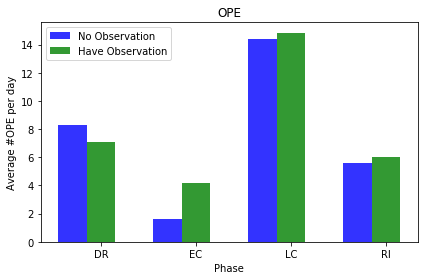

<Figure size 432x288 with 0 Axes>

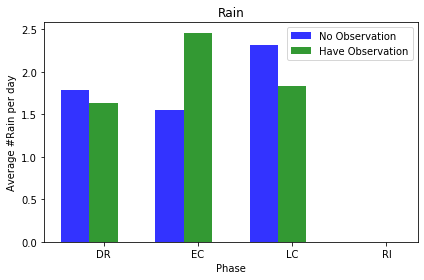

<Figure size 432x288 with 0 Axes>

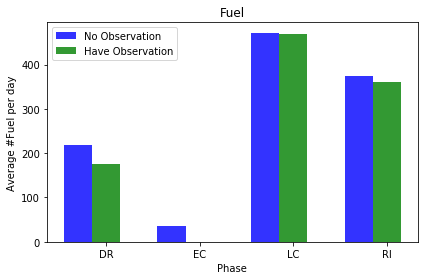

<Figure size 432x288 with 0 Axes>

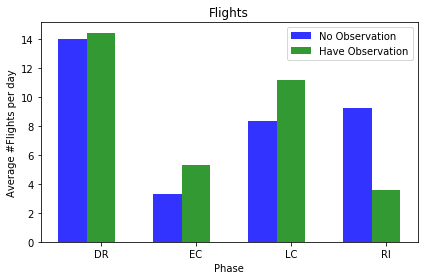

In [14]:
factors = ['OPE', 'Rain', 'Fuel', 'Flights']

for n in range(4):
    n_groups2 = 4
    plt.figure()
    fig, ax = plt.subplots()
    index = np.arange(n_groups2)
    bar_width = 0.3
    opacity = 0.8

    rects1 = plt.bar(index, join_clean.iloc[:,n], bar_width, 
    alpha=opacity,
    color='b',
    label='No Observation')

    rects2 = plt.bar(index + bar_width, join_clean.iloc[:,n+4], bar_width,
    alpha=opacity,
    color='g',
    label='Have Observation')

    plt.xlabel('Phase')
    plt.ylabel('Average #'+factors[n]+' per day')
    plt.title(factors[n] )
    plt.xticks(index + bar_width, ('DR', 'EC','LC','RI'))
    plt.legend()
    plt.tight_layout()
    plt.show()